In [1]:
# Run this once
import sys
import os

sys.path.append('/app/src/data_access')
os.chdir('..')

from word_cloud_generator import WordCloudGenerator, Operator

source_path = 'data/annotations/'

%load_ext autoreload

# Corpus analysis

This notebook is used to gain information about the corpus.

## 1. Word clouds

The following sections create word clouds for named entities in the corpus. The world cloud generator has different functions in order to create meaningful word clouds. As the word clouds are highly configurable, the following listing contains all coarse entity types and their fine sub types:

- PER: PERmentioned, PERaddressee, PERauthor
- DATE: DATEletter, DATEmentioned, DATErecieved, DATEanswered, DATEpoststamp
- PLACE: PLACEmentioned, PLACEfrom, PLACEto,
- OBJ: OBJtopography
- ORG: ORGmentioned, ORGaddressee
- MISC,
- LIT

### 1.1 Total word clouds

The following sections show word clouds containing all named entities. Each word of an entity type has its own color. The colors are defined for the coarse entity types.

The total word cloud generation takes arguments to configure the word clouds. It's possible to exclude certain entity types or specific entities.

First it's necessary to extract the data for the word clouds. The following section is time consuming. Therefore, it's only needed to be ran once:

In [2]:
%autoreload 2

generator = WordCloudGenerator()
generator.extract_total_data(source_path = source_path)

After loading the data, the word clouds can be generated. Note that the word clouds can be exported to files.

**Example 1:** 
Word cloud of all entities

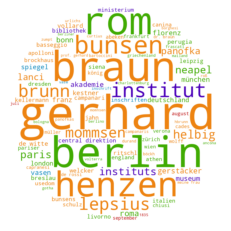

In [3]:
output_path = 'resources/corpus_analysis/wordclouds/01_total.png'

generator.generate(output_path = output_path)

**Example 2:**
Word cloud with exclusions of highly occurring named entities such as "gerhard", "rom", "berlin", "braun" and "bunsen"

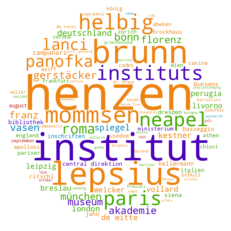

In [4]:
exclude_entities = ['gerhard', 'rom', 'berlin', 'braun', 'bunsen']
    
output_path = 'resources/corpus_analysis/wordclouds/02_excluded_entities.png'

generator.generate(
    output_path = output_path,
    exclude_entities = exclude_entities)

**Example 3:**
Word clouds with exclusions of entity types. It's possible to create word clouds for each entity type

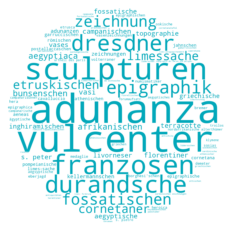

In [5]:
exclude_entity_types = [
    'PER', 
    'DATE', 
    'PLACE',
    'OBJ', 
    'ORG', 
    'LIT', 
#    'MISC'
]
    
output_path = 'resources/corpus_analysis/wordclouds/03_entity_types/misc.png'

generator.generate(
    output_path = output_path,
    exclude_entity_types = exclude_entity_types)

### 1.2 Co-occurence word clouds

While the word clouds above show all entities, the following sections give the opportunity to create relational word clouds. The relation is based on the letter the entities are mentioned.

The procedure is different here. Before the word cloud can be generated, the co-occurence must be built up.

The co-occurence function is highly configurable. The parameter are defined as follows:
- base_words (required): the entities or words for which the co-occurences should be identified
- entity_only (optional): if False, co-occurences will be identified also for regular words without named entity
- base_entity_types (optional): if set, the base_words only will be built up only for the specific types. The types can be coarse or fine
- relation_entity_types (optional): if set, the co-occurences will be built up only for the specific types. The types can be coarse or fine

The following sections give examples on how to use the functions.

**Example 4:**
word cloud for "gerhard" as "PERauthor" with co-occurences for "PERaddressee"

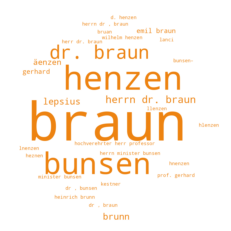

In [6]:
output_path = 'resources/corpus_analysis/wordclouds/04_gerhard_author_addressees.png'

word_entities = {'gerhard': 'PERauthor'}
relation_entity_types = ['PERaddressee']

generator.extract_coocurrences(
    source_path = source_path,
    word_entities = word_entities,
    relation_entity_types = relation_entity_types)
generator.generate(output_path = output_path)

**Example 5:**
word cloud for "gerhard" as "PERauthor" with co-occurences for "PERmentioned", "DATEmentioned", "PLACEmentioned", "ORGmentioned"

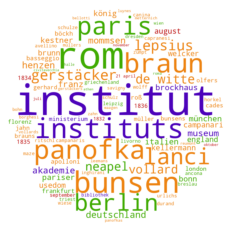

In [7]:
output_path = 'resources/corpus_analysis/wordclouds/05_gerhard_author_all_mentions.png'

word_entities = {'gerhard': 'PERauthor'}
relation_entity_types = ['PERmentioned', 'DATEmentioned', 'PLACEmentioned', 'ORGmentioned']

generator.extract_coocurrences(
    source_path = source_path,
    word_entities = word_entities,
    relation_entity_types = relation_entity_types)
generator.generate(output_path = output_path)

**Example 6:**
word cloud for "gerhard" as "PERauthor" with co-occurences for "PERmentioned", "ORGmentioned"

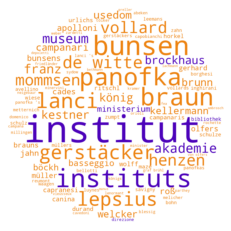

In [8]:
output_path = 'resources/corpus_analysis/wordclouds/06_gerhard_author_per-org_mentions.png'

word_entities = {'gerhard': 'PERauthor'}
relation_entity_types = ['PERmentioned', 'ORGmentioned']

generator.extract_coocurrences(
    source_path = source_path,
    word_entities = word_entities,
    relation_entity_types = relation_entity_types)
generator.generate(output_path = output_path)

**Example 7:**
word cloud for "gerhard" as "PERauthor" with co-occurences for "PLACEmentioned"

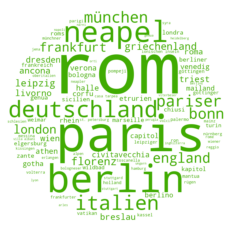

In [9]:
output_path = 'resources/corpus_analysis/wordclouds/07_gerhard_author_place_mentions.png'

word_entities = {'gerhard': 'PERauthor'}
relation_entity_types = ['PLACEmentioned']

generator.extract_coocurrences(
    source_path = source_path,
    word_entities = word_entities,
    relation_entity_types = relation_entity_types)
generator.generate(output_path = output_path)

**Example 8:**
word cloud for "vasen" with co-occurences for "PERauthor"

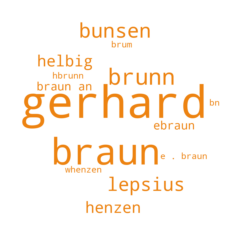

In [10]:
output_path = 'resources/corpus_analysis/wordclouds/08_vasen_authors.png'

word_entities = {'vasen': None}
relation_entity_types = ['PERauthor']

generator.extract_coocurrences(
    source_path = source_path,
    word_entities = word_entities,
    relation_entity_types = relation_entity_types)
generator.generate(output_path = output_path)

**Example 9:**
word cloud for "bullettino" with co-occurences for "PERauthor"

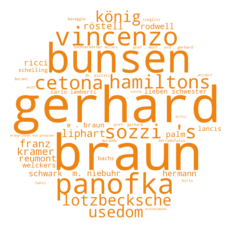

In [11]:
output_path = 'resources/corpus_analysis/wordclouds/09_bullettino_authors.png'

word_entities = {'bullettino': None}
relation_entity_types = 'PERauthor'

generator.extract_coocurrences(
    source_path = source_path,
    word_entities = word_entities,
    relation_entity_types = relation_entity_types)
generator.generate(output_path = output_path)

**Example 10:**
word cloud for "annalen" and "annali" with co-occurences for "PERauthor"

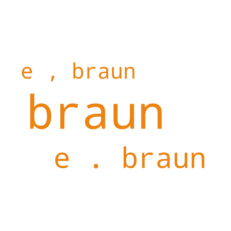

In [12]:
output_path = 'resources/corpus_analysis/wordclouds/10_annalen-annali_authors.png'

word_entities = {
    'annalen': None, 
    'annali': None
}
relation_entity_types = ['PERauthor']

generator.extract_coocurrences(
    source_path = source_path,
    word_entities = word_entities,
    relation_entity_types = relation_entity_types)
generator.generate(output_path = output_path)

**Example 11:**
word cloud for "photographie", "photographien", "fotografie" with co-occurences for "PERauthor"

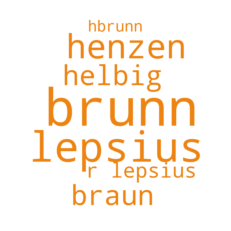

In [13]:
output_path = 'resources/corpus_analysis/wordclouds/11_photographie_authors.png'

word_entities = {
    'photographie': None,
    'photographien': None,
    'fotografie': None
}
relation_entity_types = ['PERauthor']

generator.extract_coocurrences(
    source_path = source_path,
    word_entities = word_entities,
    entity_only = False,
    relation_entity_types = relation_entity_types)
generator.generate(output_path = output_path)

**Example 12:**
word cloud for "daguerreotyp" with co-occurences for "PERauthor"

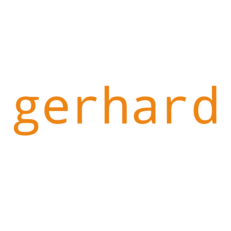

In [14]:
output_path = 'resources/corpus_analysis/wordclouds/12_daguerreotyp_authors.png'

word_entities = {'daguerreotyp': None}
relation_entity_types = ['PERauthor']

generator.extract_coocurrences(
    source_path = source_path,
    word_entities = word_entities,
    entity_only = False,
    relation_entity_types = relation_entity_types)
generator.generate(output_path = output_path)

**Example 13:**
word cloud for "bibliothek" and "bibliotheken" with co-occurences for "PERauthor"

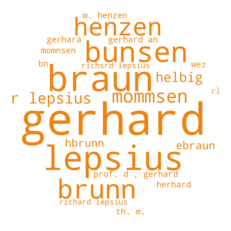

In [15]:
output_path = 'resources/corpus_analysis/wordclouds/13_bibliothek_authors.png'

word_entities = {
    'bibliothek': None,
    'bibliotheken': None}
relation_entity_types = ['PERauthor']

generator.extract_coocurrences(
    source_path = source_path,
    word_entities = word_entities,
    entity_only = False,
    relation_entity_types = relation_entity_types)
generator.generate(output_path = output_path)

**Example 14:**
word cloud for "braun" as "PERauthor" and "gerhard" "PERaddressee" with all co-occurences

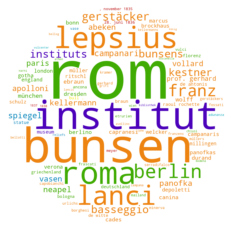

In [16]:
output_path = 'resources/corpus_analysis/wordclouds/14_gerhard_author-braun_addressee.png'

word_entities = {
    'braun': 'PERauthor',
    'gerhard': 'PERaddressee'
}

generator.extract_coocurrences(
    source_path = source_path,
    word_entities = word_entities,
    operator = Operator.AND)
generator.generate(output_path = output_path)

**Example 15:** 
word cloud for "gerhard" as "PERauthor" and "braun" "PERaddressee" with all co-occurences

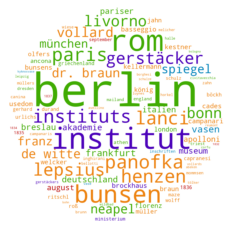

In [17]:
output_path = 'resources/corpus_analysis/wordclouds/15_gerhard_author-braun_addressee.png'

word_entities = {
    'braun': 'PERaddressee',
    'gerhard': 'PERauthor'
}

generator.extract_coocurrences(
    source_path = source_path,
    word_entities = word_entities,
    operator = Operator.AND)
generator.generate(output_path = output_path)